https://www.youtube.com/watch?v=TW5RqdDBasg

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ri = pd.read_csv('data/police.csv')

In [3]:
ri.head(3)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
ri.shape
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [5]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

## Remove the column that only contains missing values

In [6]:
ri.drop('county_name', axis= 'columns' , inplace=True)

In [7]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [8]:
#another posible method
#ri.dropna(axis='columns', how='all')

## Do men or women speed more often?

In [9]:
ri[ri.violation =='Speeding'].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [10]:
#percentages
ri[ri.violation =='Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [11]:
ri[ri.driver_gender == 'M'].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [12]:
# in one sentence

In [13]:
ri.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

In [14]:
ri.groupby('driver_gender').violation.value_counts(normalize=True).unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.105780,0.136277,0.029348,0.043086,0.027009,0.65850
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


# Does gender affects who gets searched during  a stop?

In [15]:
ri.search_conducted.mean()

0.03483720473942948

In [16]:
#ri.groupby('driver_gender').search_conducted.value_counts(normalize=True)

In [17]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [18]:
ri.groupby(['violation','driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

# 4. Why is search_type missing so often

In [19]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [20]:
print(ri.search_conducted.value_counts())
print("same number as search type nulls")

False    88545
True      3196
Name: search_conducted, dtype: int64
same number as search type nulls


In [21]:

print(ri[ri.search_conducted==False].search_type.value_counts())
print('no values to count')
print('value counts ignore missing by defult but using  dropna : False....      ')
( ri.search_type.value_counts(dropna=False) )

Series([], Name: search_type, dtype: int64)
no values to count
value counts ignore missing by defult but using  dropna : False....      


NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Incident to Arrest,Protective Frisk                            33
Probable Cause,Protective Frisk                                33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Protective Frisk,Reasonable Suspicion                          11
Inventory,

# During a search, how often is the driver frisked?

In [22]:
#searching within string pandas string methods: accross the entire pandas series
ri['frisk'] = ri.search_type.str.contains('Protective Frisk')

In [23]:
ri.frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [24]:
ri.frisk.sum()

274

In [25]:
ri.frisk.mean()

0.08573216520650813

In [26]:
274 / (274 +2922)
print('pandas is excluding missing values by default')

pandas is excluding missing values by default


# 6. Which year had the least number of stops?

In [27]:
ri.stop_date.str.slice(0,4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [28]:
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
combined[:5]

0    2005-01-02 01:55
1    2005-01-18 08:15
2    2005-01-23 23:15
3    2005-02-20 17:15
4    2005-03-14 10:00
Name: stop_date, dtype: object

In [29]:
pd.to_datetime(ri.stop_date)[:4]

0   2005-01-02
1   2005-01-18
2   2005-01-23
3   2005-02-20
Name: stop_date, dtype: datetime64[ns]

In [30]:
ri['stop_datetime']= pd.to_datetime(combined)

In [31]:
#ri.dtypes

In [32]:
ri.stop_datetime.dt.year.value_counts().sort_values().index[0]

2005

In [33]:
ri.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

# 7. How does drug activity  change by time of day

In [34]:
ri.drugs_related_stop.mean()

0.008883705213590434

In [35]:
#        concept
#    ri.groupby('hour').drugs_related_stop.mean()

In [36]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean()

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

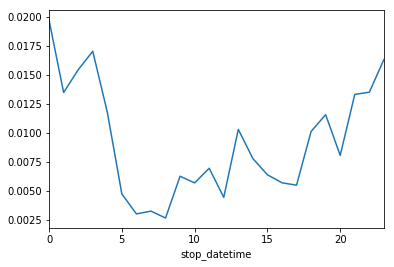

In [37]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

# 8. Do most stops occur at night?

In [38]:
print('value counts outputs a series')
ri.stop_datetime.dt.hour.value_counts()


value counts outputs a series


10    7350
9     6838
11    5877
14    5634
23    5629
0     5221
8     5210
13    4842
15    4832
7     4572
1     4442
16    3844
12    3582
22    3473
20    3340
6     3290
2     2975
17    2900
19    2587
18    2168
21    1499
3     1172
4      254
5      210
Name: stop_datetime, dtype: int64

### using sort_index()

In [39]:
ri.stop_datetime.dt.hour.value_counts().sort_index()

0     5221
1     4442
2     2975
3     1172
4      254
5      210
6     3290
7     4572
8     5210
9     6838
10    7350
11    5877
12    3582
13    4842
14    5634
15    4832
16    3844
17    2900
18    2168
19    2587
20    3340
21    1499
22    3473
23    5629
Name: stop_datetime, dtype: int64

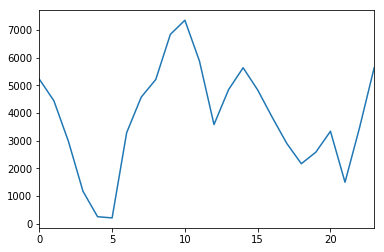

In [40]:
ri.stop_datetime.dt.hour.value_counts().sort_index().plot()

In [41]:
ri[(ri.stop_datetime.dt.hour >4) & (ri.stop_datetime.dt.hour < 22 ) ].shape


(68575, 16)

In [42]:
ri.shape

(91741, 16)

# 9 . Find the bad data in stop_duration coumn and fix

In [43]:
ri.stop_duration.value_counts(dropna= False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [46]:
ri.loc[(ri.stop_duration=='1') | (ri.stop_duration =='2'), 'stop_duration' ]='NaN'

usin .loc[rows, cols]

In [47]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

NaN is not a string

In [49]:
import numpy as np

In [50]:
ri.loc[(ri.stop_duration=='NaN') , 'stop_duration' ]=np.nan

In [51]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64